In [1]:
import xarray as xr
import math 
import numpy as np 
import matplotlib.pyplot as plt 
import s3fs

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path2 = 's3://velocity-u.zarr'
data_path3 = 's3://velocity-v.zarr'

remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

du = xr.open_zarr(store=store2, consolidated=True)
dv = xr.open_zarr(store=store3, consolidated=True)

In [10]:
u = du.vozocrtx.isel(x=slice(200,1400),y=slice(650,1800)).rename({'depthu' : 'depth'})
v = dv.vomecrty.isel(x=slice(200,1400),y=slice(650,1800)).rename({'depthv' : 'depth'})

In [14]:
x = 836
y = 440
d = 15
rd = xr.merge([u.isel(x=x,y=y,depth=d),v.isel(x=x,y=y,depth=d)], compat='override')

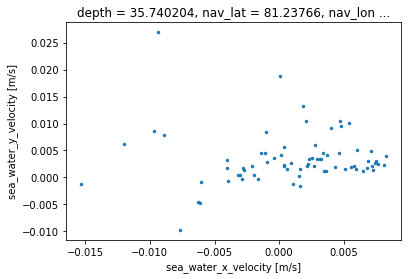

In [15]:
rd.plot.scatter(x='vozocrtx', y='vomecrty', s=6)

In [17]:
vec = np.array([2,4])
print(vec[0],vec[1])

velp = (u.isel(x=x,y=y,depth=d)*vec[0] + v.isel(x=x,y=y,depth=d)*vec[1])/np.sqrt(vec[0]**2+vec[1]**2)
velo = (- u.isel(x=x,y=y,depth=d)*vec[1] + v.isel(x=x,y=y,depth=d)*vec[0])/np.sqrt(vec[0]**2+vec[1]**2) #rotere vector [x,y] 90 grader m/klokka = [x,-y]

vel_r = xr.merge([velp.to_dataset(name='vpar'),velo.to_dataset(name='vort')],compat='override')

2 4


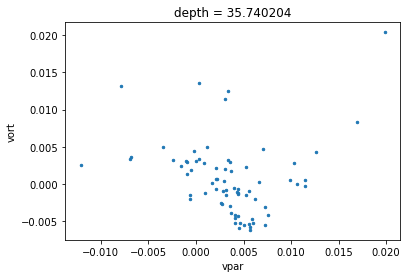

In [18]:
vel_r.plot.scatter(x='vpar', y='vort', s=6)

(-0.02, 0.02)

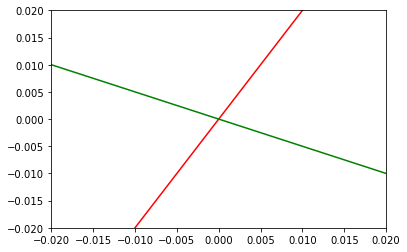

In [33]:
fig, ax = plt.subplots()
#ax.scatter(vel_r.vpar,vel_r.vort,s=6)
ax.plot([0,vec[0]],[0,vec[1]],'r')
ax.plot([0,-vec[0]],[0,-vec[1]],'r')
ax.plot([0,-vec[1]],[0,vec[0]],'g')
ax.plot([0,vec[1]],[0,-vec[0]],'g')
ax.set_xlim(-0.02,0.02)
ax.set_ylim(-0.02,0.02)

In [34]:
a = np.array([2,4])
b = np.array([-4,2])
d = np.dot(a,b)
print(d) # d=0 --> disse skal være orthogonale 

0


In [ ]:
v_r = np.array(vel_r.vpar.values)
v_o = np.array(vel_r.vort.values)